In [1]:
# Esconder warnings
import warnings
warnings.filterwarnings('ignore')

# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
path = '../datasets/retail_sales_dataset.csv'
df = pd.read_csv(path)
# Imprimir los prmeros valores
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Exploración inicial del dataset

In [2]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Preprocesado de datos

In [3]:
# Convertis la columna Date de object a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificar si hay valores nulos
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Exploracion de los datos

                 count                           mean                  min  \
Transaction ID  1000.0                          500.5                  1.0   
Date              1000  2023-07-03 00:25:55.200000256  2023-01-01 00:00:00   
Age             1000.0                         41.392                 18.0   
Quantity        1000.0                          2.514                  1.0   
Price per Unit  1000.0                         179.89                 25.0   
Total Amount    1000.0                          456.0                 25.0   

                                25%                  50%                  75%  \
Transaction ID               250.75                500.5               750.25   
Date            2023-04-08 00:00:00  2023-06-29 12:00:00  2023-10-04 00:00:00   
Age                            29.0                 42.0                 53.0   
Quantity                        1.0                  3.0                  4.0   
Price per Unit                 30.0             

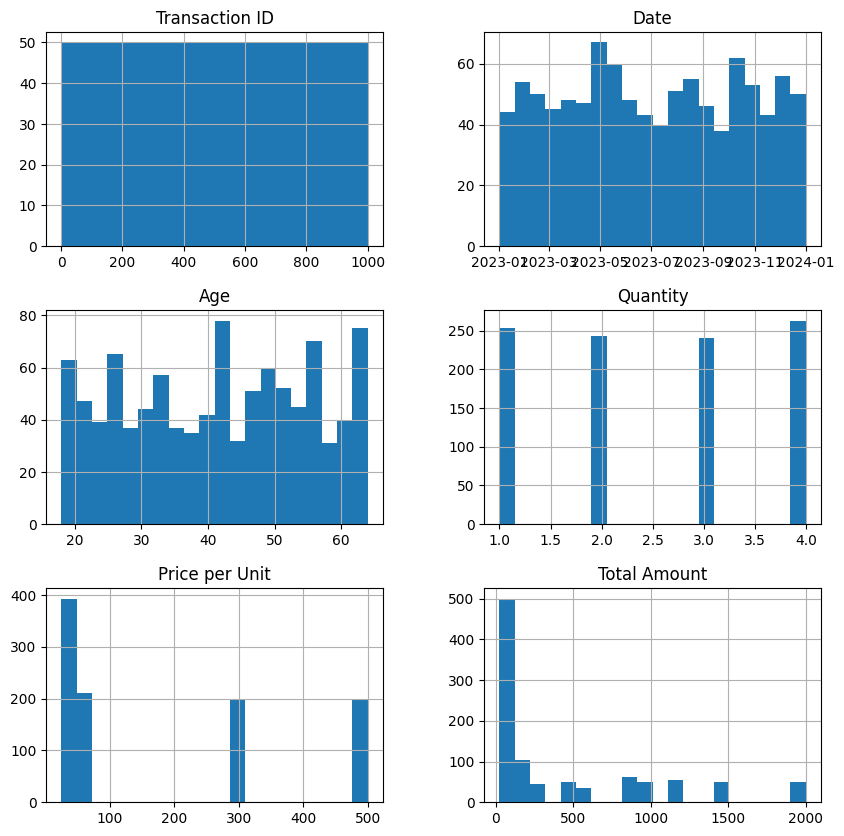

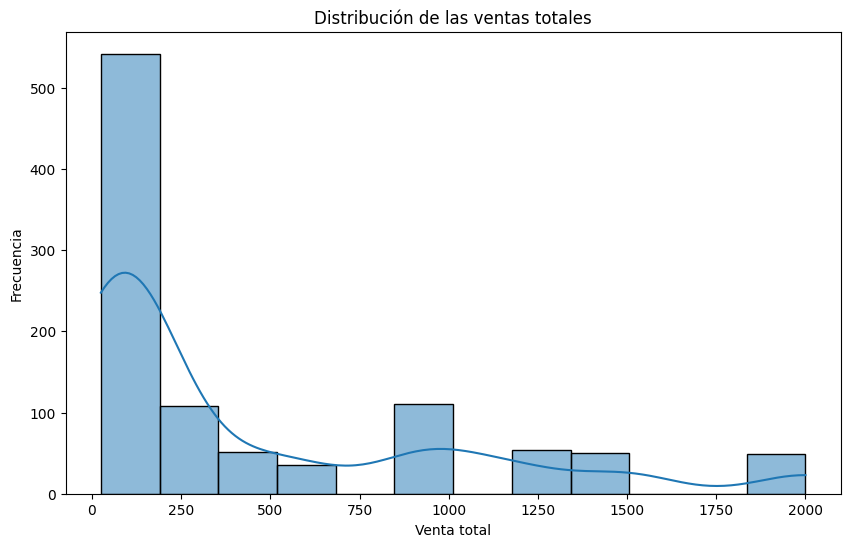

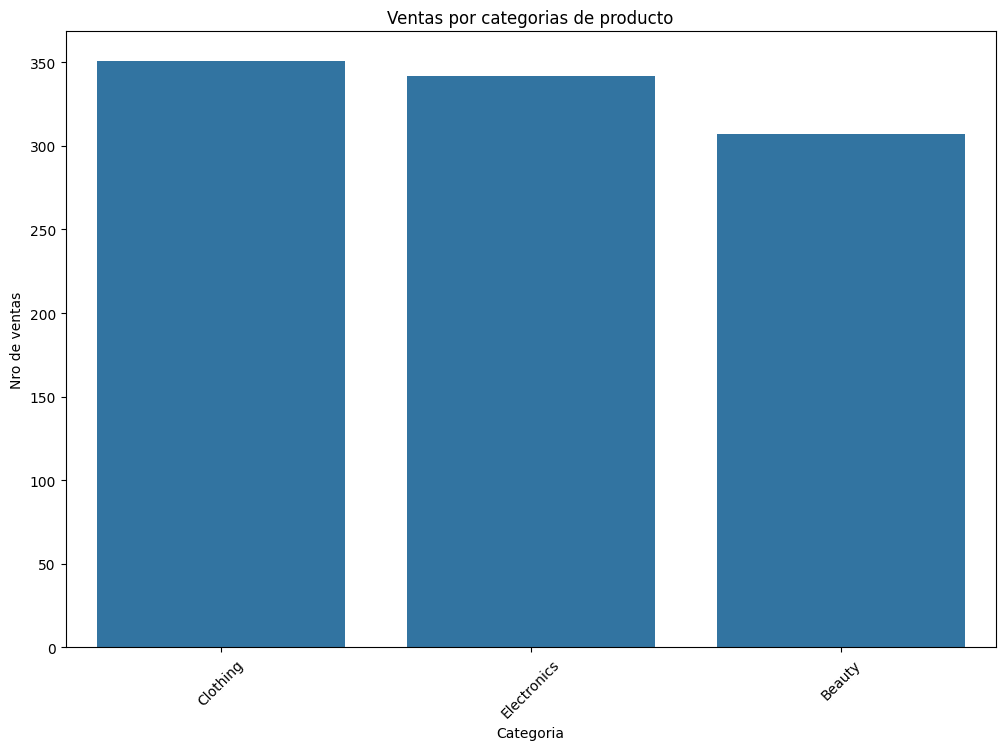

In [4]:
# Resumen estadístico
print(df.describe().T)

# Creamos un histograma la para distribucion de los datos
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Distribución de la columna total amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], kde=True)
plt.title('Distribución de las ventas totales')
plt.xlabel('Venta total')
plt.ylabel('Frecuencia')
plt.show()

# Ventas por categoria de producto
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Ventas por categorias de producto')
plt.xlabel('Categoria')
plt.ylabel('Nro de ventas')
plt.xticks(rotation=45)
plt.show()

### Analisis de correlacion

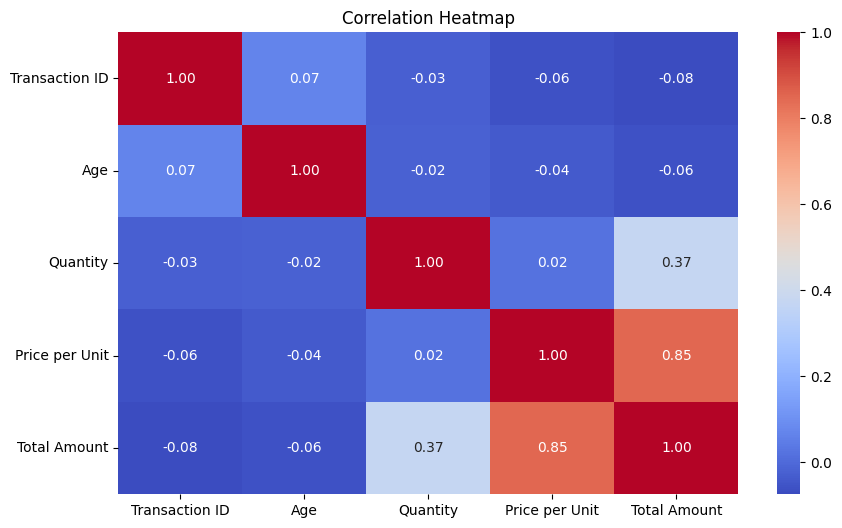

In [5]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()